# Step 1: Import Libraries
In this step, we import the necessary libraries to build a Decision Tree Classifier. We will use:
- `pandas` for data manipulation.
- `numpy` for numerical operations.
- `train_test_split` from `sklearn` to split the data.
- `DecisionTreeClassifier` to build the classifier.
- `accuracy_score` for evaluating model performance.
- `matplotlib` and `seaborn` for visualizing data.

etc.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Step 2: Load the Dataset
Load the dataset into a pandas DataFrame. Ensure that your dataset contains the necessary features and target column for classification.


In [78]:
data = pd.read_csv('drug200.csv')

In [79]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [81]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [82]:
count = data['Drug'].value_counts()

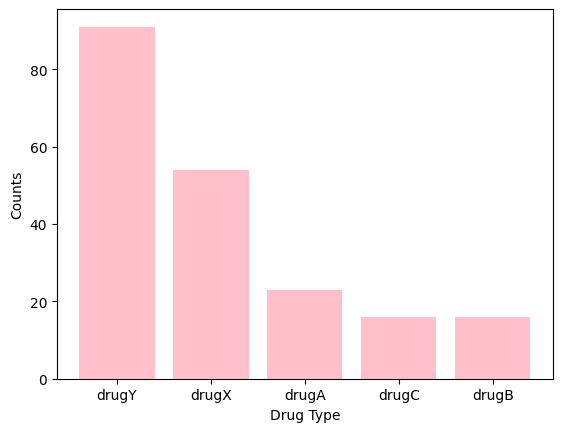

In [83]:
plt.bar(count.index,count.values, color ='pink')
plt.xlabel('Drug Type')
plt.ylabel('Counts')
plt.show()

# Step 3: Preprocess the Data
In this step, we handle missing values, encode categorical data using `LabelEncoder`, and ensure the data is ready for the Decision Tree Classifier.


In [84]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [85]:
encoder = LabelEncoder()

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [87]:
columns = ['Sex','BP','Cholesterol','Drug']

In [88]:
for col in columns:
    data[col]= encoder.fit_transform(data[col])

In [89]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


# Step 4: Define Features and Target
Separate the features (independent variables) and the target (dependent variable). 
The features are the predictors, and the target is the column you want to classify.


In [90]:
# Define X (features) and y (target)
x = data.iloc[:,0:5]

In [91]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [92]:
y = data['Drug'].values
y = y.ravel()

In [93]:
y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

# Step 5: Split the Data
Split the data into training and testing sets to evaluate the model's performance.
- `x_train`, `y_train`: Training data.
- `x_test`, `y_test`: Testing data.
We use an 80-20 split ratio.


In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Step 6: Use StandardScaler for Better Optimization
Standardize the feature columns using `StandardScaler` only on the training data.

In [95]:
scaler = StandardScaler()

In [96]:
x_train = scaler.fit_transform(x_train)

In [97]:
x_test = scaler.transform(x_test)

# Step 7: Train the Decision Tree Classifier
Initialize and train the Decision Tree Classifier on the training dataset. 
The classifier will learn patterns to predict the target variable.


In [98]:
model = DecisionTreeClassifier(random_state=43)

In [99]:
model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=43)

# Step 8: Evaluate the Model
Evaluate the model's performance on the testing set. Calculate the accuracy and display the confusion matrix.


In [100]:
# Predict on test data
y_pred = model.predict(x_test)

In [101]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 1.0


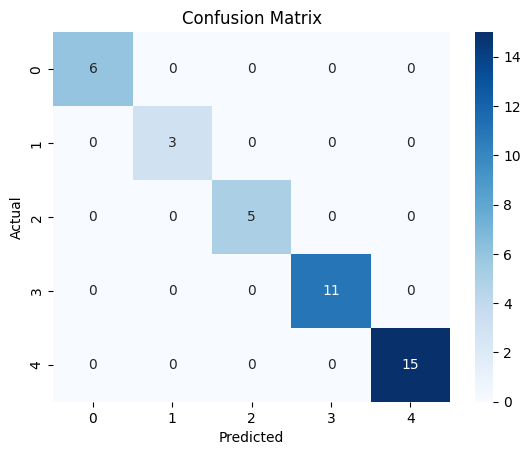

In [102]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 9: Compare Actual vs Predicted
Compare the actual values from the test set with the predicted values in a DataFrame for better visualization.


In [103]:
# Create a DataFrame to compare
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [104]:
comparison.head(10)

,Actual,Predicted
0,3,3
1,4,4
2,3,3
3,2,2
4,4,4
5,4,4
6,4,4
7,3,3
8,0,0
9,3,3


# Step 10: Save the Model
Save the trained Decision Tree Classifier using `joblib` for later use.


In [105]:
import joblib

joblib.dump(model,'DecisionTree.joblib')

['DecisionTree.joblib']

# Conclusion
The Decision Tree Classifier achieved an accuracy of **0.975**. 
The confusion matrix indicates that the classifier performs well on most classes, but some misclassifications exist.

Further improvements can be achieved by:
- Trying different criteria (e.g., Gini vs. Entropy).
- Balancing the dataset if it's imbalanced.
